In [2]:
# 준비 

# colab 드라이브 연결하기 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 패키지 불러오기 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

## 01. 데이터 준비 

In [2]:
df1 = pd.read_csv("/content/drive/MyDrive/프로젝트/멀티캠퍼스/프로젝트1/T20_2019_1백만.1.csv", encoding = "euc-kr")
df2 = pd.read_csv("/content/drive/MyDrive/프로젝트/멀티캠퍼스/프로젝트1/T20_2019_1백만.2.csv", encoding = "euc-kr")
df3 = pd.read_csv("/content/drive/MyDrive/프로젝트/멀티캠퍼스/프로젝트1/T20_2019_1백만.3.csv", encoding = "euc-kr")

In [3]:
# 데이터 합치기 
df = pd.concat([df1,df2,df3])
del df1, df2, df3

1) 입원여부 컬럼 생성

In [23]:
df['서식코드'].unique()

array([3, 2, 8])

In [4]:
# 서식코드를 입원여부로 변환
# 1이면 입원 O, 0이면 입원 X 
df.loc[(df['서식코드']==2), '서식코드'] = 1 
df.loc[(df['서식코드']==3), '서식코드'] = 0
df.loc[(df['서식코드']==8), '서식코드'] = 0 

In [25]:
# 변환 확인 
df['서식코드'].unique()

array([0, 1])

In [5]:
# 컬럼명 변경 
df.rename(columns = {'서식코드' : '입원여부'}, inplace= True)

In [27]:
# 변경 확인 
df.columns

Index(['기준년도', '가입자 일련번호', '진료내역일련번호', '성별코드', '연령대코드', '시도코드', '요양개시일자',
       '입원여부', '진료과목코드', '주상병코드', '부상병코드', '요양일수', '입내원일수', '심결가산율',
       '심결요양급여비용총액', '심결본인부담금', '심결보험자부담금', '총처방일수', '데이터 기준일자'],
      dtype='object')

2) 시도 코드 시도명으로 변환

In [6]:
# 시도 데이터 불러오기 
df_sido = pd.read_csv("/content/drive/MyDrive/프로젝트/멀티캠퍼스/프로젝트1/sido.txt", sep = "|")
df_sido.head(2)

,시도코드,시도명
0,11,서울시
1,26,부산시


In [7]:
df_sido.columns = ['시도코드', '시도명']

In [8]:
df = pd.merge(df, df_sido, how = 'left', on = '시도코드')
df.head(2)

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,입원여부,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,시도명
0,2019,1,104243474,2,12,46,20191104,0,5,M751,M750,1,1,0.25,19240,9600,9640,0,20201222,전라남도
1,2019,1,107479370,2,12,46,20190806,0,1,E1164,N308,1,1,0.25,145680,72800,72880,0,20201222,전라남도


3) 연령대코드 연령대로 변환

In [ ]:
df['연령대코드'].unique()

In [9]:
count = 0
age = 80
for i in range(18,0, -1) : 
  if count == 0 : 
    df.loc[(df['연령대코드']==i), '연령대코드'] = str(age) 
    count += 1 
  elif count ==1 : 
    df.loc[(df['연령대코드']==i), '연령대코드'] = str(age) 
    count = 0 
    age -= 10  

In [ ]:
df['연령대코드'].unique()

4) 진료과목코드 진료과목으로 변환

In [6]:
# 진료과목코드 데이터 불러오기 
df_subject = pd.read_excel("/content/drive/MyDrive/프로젝트/멀티캠퍼스/프로젝트1/컬럼정보_코드.xls")
df_subject.head(2)

,코드구분,설명,코드,명칭
0,진료과목코드,분석차원_진료과목코드,0,일반의
1,진료과목코드,분석차원_진료과목코드,1,내과


In [7]:
# 안쓰는 데이터 컬럼 제거 
df_subject.drop(['코드구분', '설명'], axis = 1 , inplace = True)
df_subject.columns = ['진료과목코드', '진료과목']

In [12]:
# 컬럼 합치기 
df = pd.merge(df, df_subject, how = 'left', on = '진료과목코드')
df.head(2)

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,입원여부,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자,시도명,진료과목
0,2019,1,104243474,2,50,46,20191104,0,5,M751,M750,1,1,0.25,19240,9600,9640,0,20201222,전라남도,정형외과
1,2019,1,107479370,2,50,46,20190806,0,1,E1164,N308,1,1,0.25,145680,72800,72880,0,20201222,전라남도,내과


In [ ]:
df.columns

In [13]:
# 안쓰는 컬럼 삭제 
df.drop(['기준년도','진료내역일련번호','데이터 기준일자','시도코드', '진료과목코드'], axis= 1, inplace = True)

5) 주상병코드 변환 

In [14]:
df['주상병코드'] = df['주상병코드'].str[:1]
df['부상병코드'] = df['부상병코드'].str[:1]

In [21]:
df.head(2)

,가입자 일련번호,성별코드,연령대코드,요양개시일자,입원여부,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,시도명,진료과목
0,1,2,50,20191104,0,M,M,1,1,0.25,19240,9600,9640,0,전라남도,정형외과
1,1,2,50,20190806,0,E,N,1,1,0.25,145680,72800,72880,0,전라남도,내과


In [1]:
df.to_csv("/content/drive/MyDrive/프로젝트/멀티캠퍼스/프로젝트1/df.csv", index = False)

NameError: ignored

In [27]:
# df_group = df.groupby(['가입자 일련번호', '주상병코드']).sum()
# df_group.head()

성별코드     요양개시일자  입원여부  ...  심결본인부담금  심결보험자부담금  총처방일수
가입자 일련번호 주상병코드                         ...                          
1        E1164    14  141336724     1  ...   368910    819530    150
         H6500     4   40382438     0  ...     9200     21720      7
         H6531     2   20190318     0  ...    14500     33940      3
         J060      6   60570836     0  ...    11300     27230      9
         M171      2   20190102     0  ...    23500     54870      7

[5 rows x 10 columns]

In [19]:
# df_disease = df.groupby(['주상병코드','부상병코드']).sum()

In [21]:
# df_disease['입원여부'].unique()

array([   1,    0,    9,    6,    2,    3,   10,    8,    4,    5,   14,
          7,   21,   13,   17,   16,   12,   15,   11,   18,   23,   29,
         45,   20,   34,   47,  122,   31,  100,   96,  104,  111,   24,
         46,  135,   28,   55,  138,   77,   19,   22,   30,   80,   35,
         50,   26,   25,  108,  115,  160,  171,   73,  239,   32,   53,
         76,   37,   71,   42,  136,  256,   75,   90,  273,  185,  244,
         41,   61,   49,   40,   33,   72,   44,   93,   85,   59,   39,
         54,   58,  102,   67,  198,  127,   48,   51,   38,   57,   36,
        172,  151,   27,   88,  154,  405,   78,  103,   66,   74,   82,
         91,   52,   99,   92,   43,   81,  180,  148,  121,   69,  166,
         68,  207,   62,   64,  101,  451,  146,   63,  301,   94,  783,
        311,  114,  214, 1041,  208,  105, 7237,  217,  144,  222,  130,
        141,  262, 4742,  106,  167,   60,  116,  540,  277,  158,  120,
        201,  238,  145,  219,   98,   84,  241,  1

In [11]:
df_ju = df.groupby(['주상병코드', '부상병코드', '입원여부']).count()
df_ju.reset_index(inplace = True)
df_ju = df_ju[['주상병코드', '부상병코드', '입원여부', '성별코드']]
df_ju.head()

,주상병코드,부상병코드,입원여부,성별코드
0,A,A,0,7197
1,A,A,1,463
2,A,B,0,4236
3,A,B,1,127
4,A,C,0,241


In [24]:
# df_ju = pd.crosstab(index=[df['주상병코드'],df['부상병코드']],columns = df['입원여부'])
# df_ju.reset_index(inplace = True)
df_ju.columns = ['주상병코드', '부상병코드', '입원X', '입원O']
df_ju['비율'] = df_ju['입원O'] /(df_ju['입원O'] + df_ju['입원X'])

In [28]:
df_ju = df_ju.sort_values(by='비율', ascending=False)
df_ju.head(50)

,주상병코드,부상병코드,입원X,입원O,비율
63,C,P,0,3,1.000000
430,R,V,0,1,1.000000
140,F,U,0,3,1.000000
166,G,X,0,2,1.000000
167,G,Y,0,1,1.000000
489,U,I,0,4,1.000000
135,F,P,0,1,1.000000
492,U,L,0,3,1.000000
359,O,P,0,4,1.000000
116,E,U,0,13,1.000000


In [19]:
df_gender = df.groupby(['성별코드', '주상병코드', '부상병코드', '입원여부']).count()
df_gender.reset_index(inplace = True)
df_gender = df_gender[['성별코드', '주상병코드', '부상병코드', '입원여부','가입자 일련번호']]
df_gender.head()

,성별코드,주상병코드,부상병코드,입원여부,가입자 일련번호
0,1,A,A,0,2871
1,1,A,A,1,242
2,1,A,B,0,789
3,1,A,B,1,73
4,1,A,C,0,148


In [22]:
df_age = df.groupby(['연령대코드', '주상병코드', '부상병코드', '입원여부']).count()
df_age.reset_index(inplace = True)
df_age = df_age[['연령대코드', '주상병코드', '부상병코드', '입원여부','가입자 일련번호']]
df_age.head()

,연령대코드,주상병코드,부상병코드,입원여부,가입자 일련번호
0,0,A,A,0,1431
1,0,A,A,1,171
2,0,A,B,0,478
3,0,A,B,1,63
4,0,A,D,0,57


In [24]:
df_ju.head(20)

,주상병코드,부상병코드,입원여부,가입자 일련번호
0,A,A,0,7197
1,A,A,1,463
2,A,B,0,4236
3,A,B,1,127
4,A,C,0,241
5,A,C,1,149
6,A,D,0,646
7,A,D,1,155
8,A,E,0,3834
9,A,E,1,732


In [48]:
import scipy.stats as stats 
import numpy as np 
data = pd.crosstab(df['부상병코드'],df['입원여부'])
X2 = stats.chi2_contingency(data)[0]
n = np.sum(data)
minDim = min(data.shape)-1

V = np.sqrt((X2/n)/minDim)
print(V)

입원여부
0    0.161968
1    1.091439
dtype: float64


In [50]:
data = pd.crosstab(df['주상병코드'],df['입원여부'])
X2 = stats.chi2_contingency(data)[0]
n = np.sum(data)
minDim = min(data.shape)-1

V = np.sqrt((X2/n)/minDim)
print(V)

입원여부
0    0.185306
1    1.248706
dtype: float64


In [4]:
df = pd.read_csv("/content/drive/MyDrive/프로젝트/멀티캠퍼스/프로젝트1/df.csv")

In [5]:
df.drop(['심결본인부담금','심결보험자부담금','가입자 일련번호', '요양개시일자'], axis = 1, inplace = True)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [10]:
# 해보고 싶은 거 : 주상병코드, 부상병코드 숫자형 변수로 변환 후, 입원여부와 상관관계 분석 
ju = df['주상병코드'].unique()
ju.sort()
bu = df['부상병코드'].unique()
bu.sort()

def function(x) :
  global bu  
  for i in range(len(bu)) : 
    if x == bu[i] : return i 


In [11]:
df['주상병코드'] = df['주상병코드'].apply(function)
df['부상병코드'] = df['부상병코드'].apply(function)
df.head(2)

,성별코드,연령대코드,입원여부,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,총처방일수,시도명,진료과목
0,2,50,0,12,12,1,1,0.25,19240,0,전라남도,정형외과
1,2,50,0,4,13,1,1,0.25,145680,0,전라남도,내과


In [12]:
df = pd.merge(df, df_subject, how = 'left', on = '진료과목')
df.head(2)

,성별코드,연령대코드,입원여부,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,총처방일수,시도명,진료과목,진료과목코드
0,2,50,0,12,12,1,1,0.25,19240,0,전라남도,정형외과,5
1,2,50,0,4,13,1,1,0.25,145680,0,전라남도,내과,1


In [13]:
from sklearn.tree import DecisionTreeClassifier


x = df.drop(["입원여부",'시도명','진료과목'], axis = 1)
y = df['입원여부']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [26]:
tree = DecisionTreeClassifier(criterion = "entropy",max_depth=5)
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
tree.score(x_test,y_test)

0.9966857767951561

In [21]:
list(x.columns)

['성별코드',
 '연령대코드',
 '주상병코드',
 '부상병코드',
 '요양일수',
 '입내원일수',
 '심결가산율',
 '심결요양급여비용총액',
 '총처방일수',
 '진료과목코드']

In [23]:
df['입원여부'].unique()

array([0, 1])

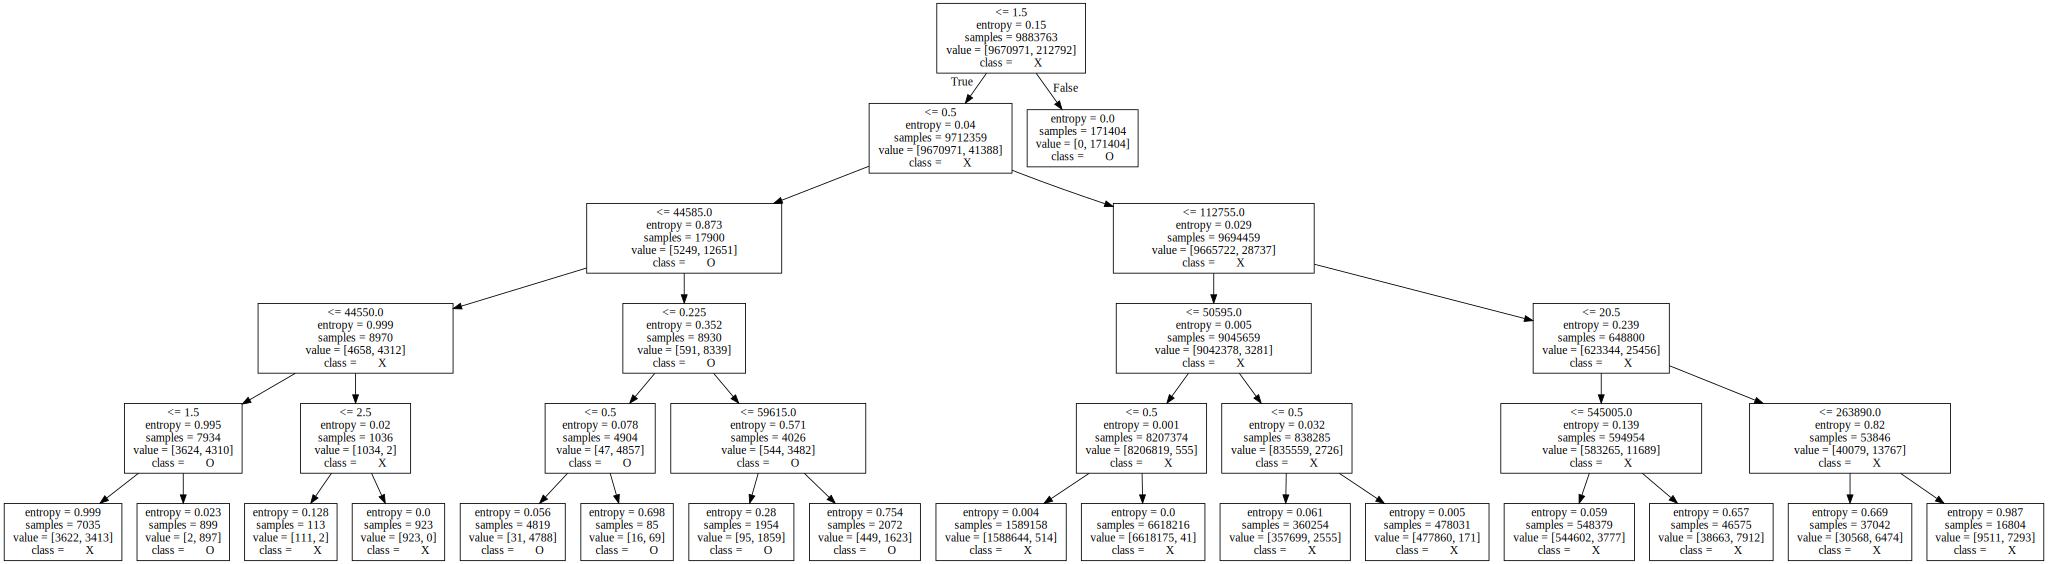

In [28]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree, # 학습한 모형
    out_file = 'tree.dot', # .dot 파일 저장 위치
    feature_names = list(x.columns), # 사용한 변수 이름
    class_names = ['입원X', '입원O'], # 예측할 타겟 클래스 이름
)
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [30]:
df.drop(['시도명','진료과목코드'], axis = 1, inplace = True)

범주형 데이터 변환 

In [6]:
df_onehot = pd.get_dummies(df, columns= ['주상병코드', '부상병코드','연령대코드','진료과목'])

In [7]:
df_onehot.head()

,성별코드,입원여부,요양일수,입내원일수,심결가산율,심결요양급여비용총액,총처방일수,시도명,주상병코드_A,주상병코드_B,주상병코드_C,주상병코드_D,주상병코드_E,주상병코드_F,주상병코드_G,주상병코드_H,주상병코드_I,주상병코드_J,주상병코드_K,주상병코드_L,주상병코드_M,주상병코드_N,주상병코드_O,주상병코드_P,주상병코드_Q,주상병코드_R,주상병코드_S,주상병코드_T,주상병코드_U,주상병코드_Z,부상병코드_A,부상병코드_B,부상병코드_C,부상병코드_D,부상병코드_E,부상병코드_F,부상병코드_G,부상병코드_H,부상병코드_I,부상병코드_J,...,연령대코드_20,연령대코드_30,연령대코드_40,연령대코드_50,연령대코드_60,연령대코드_70,연령대코드_80,진료과목_가정의학과,진료과목_결핵과,진료과목_구강악안면외과,진료과목_내과,진료과목_마취통증의학과,진료과목_방사선종양학과,진료과목_병리과,진료과목_비뇨의학과,진료과목_산부인과,진료과목_성형외과,진료과목_소아청소년과,진료과목_신경과,진료과목_신경외과,진료과목_안과,진료과목_영상의학과,진료과목_예방의학과,진료과목_외과,진료과목_응급의학과,진료과목_이비인후과,진료과목_일반의,진료과목_재활의학과,진료과목_정신건강의학과,진료과목_정형외과,진료과목_직업환경의학과,진료과목_진단검사의학과,진료과목_치과교정과,진료과목_치과보존과,진료과목_피부과,진료과목_한방내과,진료과목_한방응급,진료과목_한방재활의학과,진료과목_핵의학과,진료과목_흉부외과
0,2,0,1,1,0.25,19240,0,전라남도,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0.25,145680,0,전라남도,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,1,1,0.25,13240,3,전라남도,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,7,21,0.25,861590,0,전라남도,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,1,1,0.15,48440,3,전라남도,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(df_onehot['입원여부'], df_onehot['주상병코드_A'])

0.025790796747717722

# 02. EDA

5) 주상병코드(앞 자리) 별 입원 비율 

In [20]:
# 주상병코드 별 입원 여부 회수 계산
df_ju = df.groupby(['주상병코드','입원여부']).count()
df_ju = df_ju[['가입자 일련번호']]
df_ju.columns = ['회수']
df_ju.reset_index(inplace = True)
df_ju.head(2)

회수
주상병코드 입원여부        
A     0     191940
      1      10429
B     0     270908
      1       3287
C     0     153579

In [24]:
# 주상병코드 별 입원 여부 비율 추가 
df_sum = pd.DataFrame(df.groupby(['주상병코드']).count()['가입자 일련번호'])
df_sum.reset_index(inplace = True)
df_ju = pd.merge(df_ju, df_sum, how = 'outer', on = ['주상병코드'])
df_ju['비율'] = df_ju['회수']/df_ju['가입자 일련번호']
df_ju.drop('가입자 일련번호', axis = 1, inplace = True)
df_ju.head(2)

,주상병코드,입원여부,회수,비율
0,A,0,191940,0.948465
1,A,1,10429,0.051535


In [16]:
# 모듈 불러오기 
import plotly.graph_objs as go 
import plotly.express as px

In [27]:
fig = go.Figure()

fig.add_trace(go.Bar(x = df_ju[df_ju['입원여부']==0]['주상병코드'], y = df_ju[df_ju['입원여부']==0]['비율'], name = '입원 X'))
fig.add_trace(go.Bar(x = df_ju[df_ju['입원여부']==1]['주상병코드'], y = df_ju[df_ju['입원여부']==1]['비율'], name = '입원 O'))

fig.update_layout(title = '주상병코드 별 입원 여부 비율', xaxis_title = '주상병코드', yaxis_title = '비율', barmode="stack" )

fig.show()

5 + ) 부상병코드 별 입원 여부 


In [29]:
# 부상병코드 별 입원 여부 회수 계산
df_bu = df.groupby(['부상병코드','입원여부']).count()
df_bu = df_bu[['가입자 일련번호']]
df_bu.columns = ['회수']
df_bu.reset_index(inplace = True)
df_bu.head(2)

,부상병코드,입원여부,회수
0,A,0,159286
1,A,1,4599


In [31]:
# 부상병코드 별 입원 여부 비율 추가 
df_sum = pd.DataFrame(df.groupby(['부상병코드']).count()['가입자 일련번호'])
df_sum.reset_index(inplace = True)
df_bu = pd.merge(df_bu, df_sum, how = 'outer', on = ['부상병코드'])
df_bu['비율'] = df_bu['회수']/df_bu['가입자 일련번호']
df_bu.drop('가입자 일련번호', axis = 1, inplace = True)
df_bu.head(2)

,부상병코드,입원여부,회수,비율
0,A,0,159286,0.971938
1,A,1,4599,0.028062


In [32]:
fig = go.Figure()

fig.add_trace(go.Bar(x = df_bu[df_bu['입원여부']==0]['부상병코드'], y = df_bu[df_bu['입원여부']==0]['비율'], name = '입원 X'))
fig.add_trace(go.Bar(x = df_bu[df_bu['입원여부']==1]['부상병코드'], y = df_bu[df_bu['입원여부']==1]['비율'], name = '입원 O'))

fig.update_layout(title = '부상병코드 별 입원 여부 비율', xaxis_title = '부상병코드', yaxis_title = '비율', barmode="stack" )

fig.show()

6) 입내원일수 분포 

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [22]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


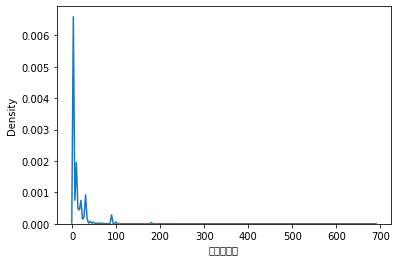

In [46]:
sns.kdeplot(df['입내원일수'])
plt.show()

Text(0.5, 0, '입내원일수')

findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.


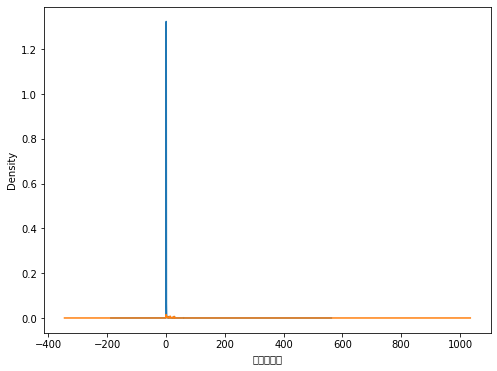

In [43]:
# 성별에 따른 입내원일수 분포 
plt.figure(figsize=(8, 6))
df['입내원일수'][df['성별코드']==1].plot(kind = 'kde')
df['입내원일수'][df['성별코드']==2].plot(kind = 'kde')

plt.xlabel('입내원일수')
plt.show()


In [17]:
fig = px.histogram(df, x="입내원일수",  color="성별코드")
fig.show()

In [22]:
# import plotly.figure_factory as ff


# group_labels = ['입내원일수'] # name of the dataset

# fig = ff.create_distplot([df['입내원일수']], group_labels)
# fig.show()

In [24]:
len(df['입내원일수'].unique())

210

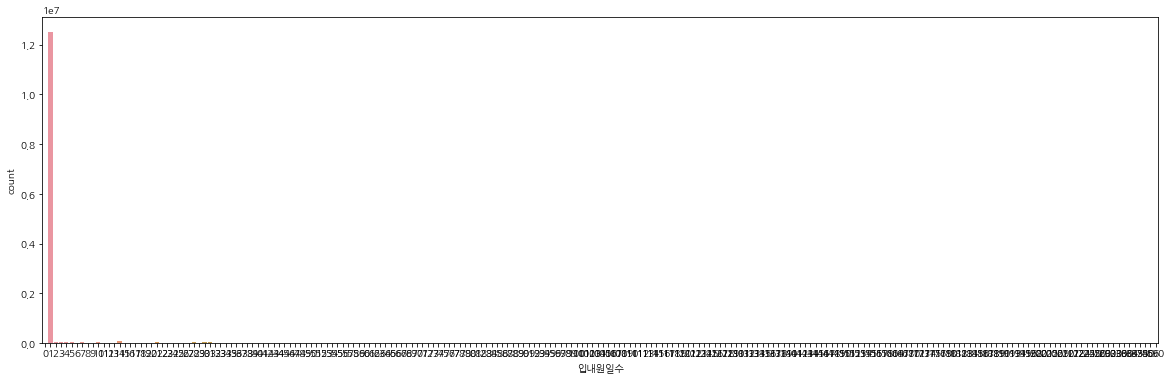

In [26]:
plt.figure(figsize=(20, 6))
sns.countplot(df['입내원일수'])
plt.show()

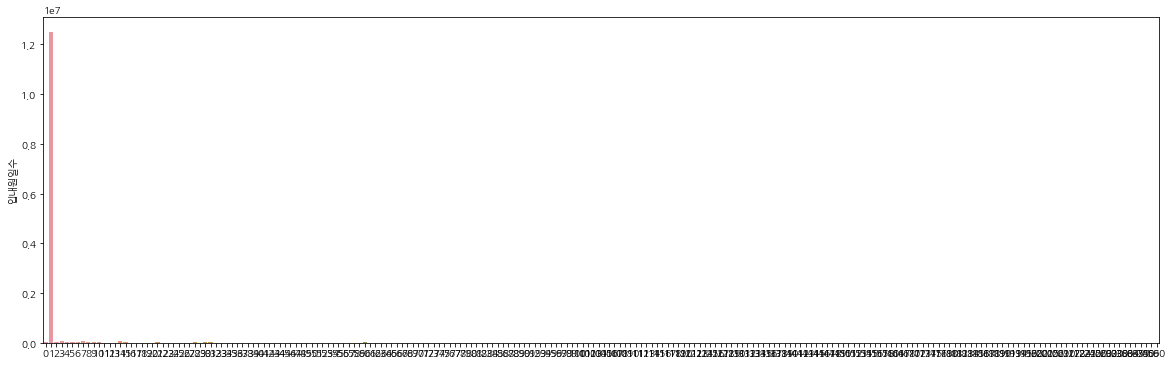

In [28]:
plt.figure(figsize=(20, 6))
sns.barplot(x=df['입내원일수'].value_counts().index, y=df['입내원일수'].value_counts())
plt.show()

In [37]:
# min_max해서 해보기 
from sklearn import preprocessing 
import numpy as np
min_max = preprocessing.MinMaxScaler()
x_scaled= min_max.fit_transform(np.array(df['입내원일수']).reshape(-1,1))


In [49]:
result = []
for i in range(len(x_scaled)) : 
  result.append(x_scaled[i][0])

In [51]:
df['입내원일수_scaled'] = result

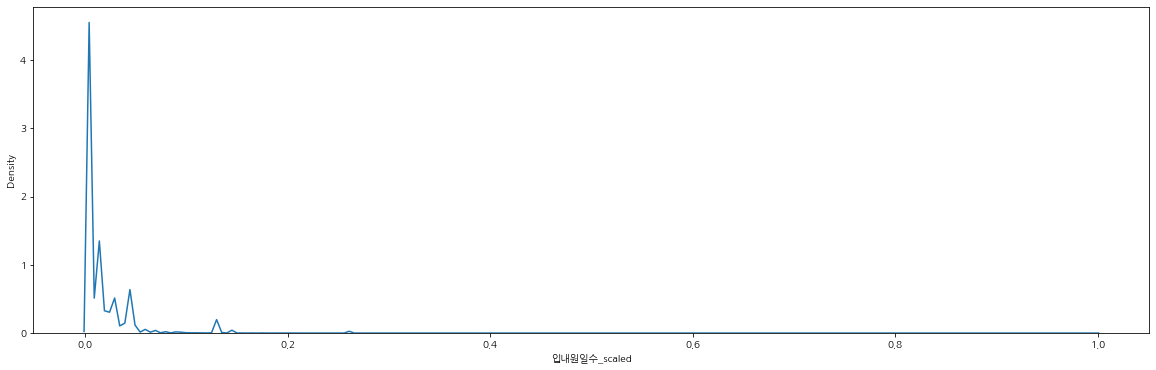

In [52]:
plt.figure(figsize=(20, 6))
sns.kdeplot(df['입내원일수_scaled'])
plt.show()

음... scale해도 왜도가 너무 커서 과연 의미가 있을 것인가?! 
그리고 당연히 입원을 하면 2일 이상이라서 그것도 생각해봐야 할 것 같음 

주상병코드와 부상병코드 연관규칙을 해볼까..? 